#### Project: Feature Extraction and Price Prediction for Mobile Phones.

##### Load improtent Modules / Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

##### Loading the Dataset.

In [3]:
df = pd.read_csv('Processed_Flipdata.csv')
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


#### Exploratory Data Analysis and Data Visulization & Analysis.

##### Check the dimension of the dataset.

In [4]:
df.shape

(541, 12)

##### Check the missing value in our dataset.

In [5]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

######  Note:-  There ie no null value in the dataset.

##### Get The Brief Imformation of Dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


##### We will first use the describe function to get the descriptive statistics of Numerical_features.

In [7]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


##### Check the value_count each Categorical columns.

In [8]:
df['Model'].value_counts()

vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: Model, Length: 187, dtype: int64

In [9]:
df['Colour'].value_counts()

Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: Colour, Length: 275, dtype: int64

In [10]:
df['Processor_'].value_counts()

Qualcomm Snapdragon 680        33
Unisoc T612                    21
Mediatek Helio A22             19
Mediatek Dimensity 1080        18
Qualcomm Snapdragon 695 5G     17
                               ..
Qualcomm Snapdragon 439         1
Snapdragon 680                  1
snapdragon 888                  1
Qualcomm Snapdragon 855         1
Qualcomm Snapdragon 8 Gen 2     1
Name: Processor_, Length: 123, dtype: int64

In [11]:
df['Prize'].value_counts()

15,999    23
9,999     22
16,999    21
8,999     20
23,999    19
          ..
20,998     1
29,499     1
8,495      1
8,449      1
38,999     1
Name: Prize, Length: 158, dtype: int64

##### Drop the unnecessary rows in dataset index 0.

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"


##### Drop the unnecessary rows in dataset index 0.

In [14]:
df.drop(0,axis=0,inplace=True)

In [15]:
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"


##### checking the duplicates value or not.

In [16]:
df[df.duplicated()]

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
27,vivo T2x 5G,Marine Blue,128,6,5000,50MP,8MP,0,16.71,Dimensity 6020,"13,999"
48,MOTOROLA e32,Arctic Blue,64,4,5000,50MP,8MP,0,16.51,Mediatek Helio G37,"7,999"
91,SAMSUNG Galaxy F14 5G,B.A.E. Purple,128,4,6000,50MP,13MP,0,16.76,"Exynos 1330, Octa Core","13,490"
132,SAMSUNG Galaxy F14 5G,OMG Black,128,6,6000,50MP,13MP,0,16.76,"Exynos 1330, Octa Core","14,490"
247,redmi min,M3),16,4,1000,0MP,0MP,0,4.57,Spreadtrum,920
344,Tecno Spark 9T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,290"
352,POCO X4 Pro 5G,Laser Black,128,8,5000,64MP,16MP,0,16.94,Qualcomm Snapdragon 695 5G,"19,499"
424,realme C30s,Stripe Black,64,4,5000,8MP,5MP,0,16.51,Unisoc SC9863A/ Unisoc SC9863A1,"8,499"
437,vivo Y100 5G,Pacific Blue,128,8,4500,64MP,16MP,0,16.21,Mediatek Dimensity 900,"23,999"
480,POCO C31,Royal Blue,64,4,5000,13MP,5MP,0,16.59,MediaTek G35,"8,999"


##### Drop the duplicate rows in dataset.

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"


In [19]:
df.shape

(530, 11)

##### Processing the column Rear Camera & Front Camera.

In [20]:
df['Rear Camera']=df['Rear Camera'].str.replace('MP','')
df['Front Camera'] = df['Front Camera'].str.replace('MP','')

In [21]:
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,"5,649"


##### Convert the datatype(object) to numerical column.

In [22]:
df['Rear Camera']=df['Rear Camera'].astype('int64')
df['Front Camera']=df['Front Camera'].astype('int64')

##### Processing the Prize column remove Comma and convert object column to numerical column.

In [23]:
df['Prize'] = df['Prize'].str.replace(',','').astype('Int64')

In [24]:
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 1 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          530 non-null    object 
 1   Colour         530 non-null    object 
 2   Memory         530 non-null    int64  
 3   RAM            530 non-null    int64  
 4   Battery_       530 non-null    int64  
 5   Rear Camera    530 non-null    int64  
 6   Front Camera   530 non-null    int64  
 7   AI Lens        530 non-null    int64  
 8   Mobile Height  530 non-null    float64
 9   Processor_     530 non-null    object 
 10  Prize          530 non-null    Int64  
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 50.2+ KB


#### Processing the column at Processor_ and creat another columns Processor_brand.

In [26]:
df['Processor_brand']= df["Processor_"].apply(lambda x :" ".join(x.split()[0:2]))
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_brand
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Unisoc Spreadtrum
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999,Qualcomm Snapdragon
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649,Mediatek Helio


In [27]:
df.drop('Processor_',axis=1,inplace=True)

In [28]:
df.head(3)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,Processor_brand
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,7299,Unisoc Spreadtrum
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,11999,Qualcomm Snapdragon
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,5649,Mediatek Helio


In [29]:
# Summary statistics of numerical features
df.describe()

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.0
mean,111.003774,5.403774,4871.752830,46.290566,12.058491,0.062264,16.449434,16322.769811
std,60.896174,1.992231,765.038577,31.388512,9.108585,0.241863,2.496566,10850.208215
min,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,920.0
25%,64.000000,4.000000,5000.000000,13.000000,5.000000,0.000000,16.510000,9415.0
50%,128.000000,6.000000,5000.000000,50.000000,8.000000,0.000000,16.710000,13999.0
75%,128.000000,8.000000,5000.000000,50.000000,16.000000,0.000000,16.940000,19367.75
max,256.000000,8.000000,7000.000000,200.000000,60.000000,1.000000,41.940000,80999.0


In [30]:
df.corr()['Prize']

Memory           0.563008
RAM              0.528962
Battery_        -0.044061
Rear Camera      0.405817
Front Camera     0.528442
AI Lens         -0.152557
Mobile Height    0.168610
Prize            1.000000
Name: Prize, dtype: float64

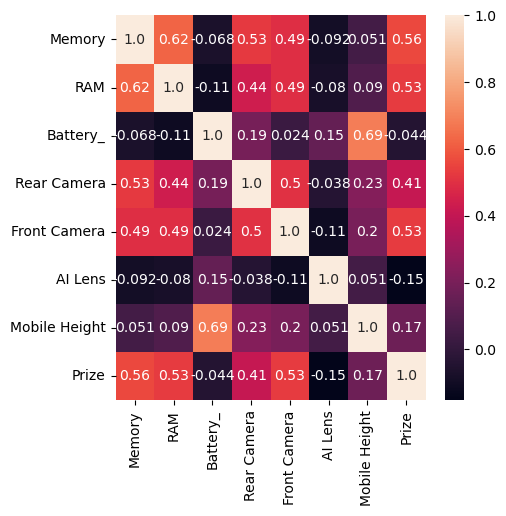

In [31]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,fmt='.2')
plt.show()

#### Data Visulization each columns.

##### Scatter plot RAM column With efect to  Prize.

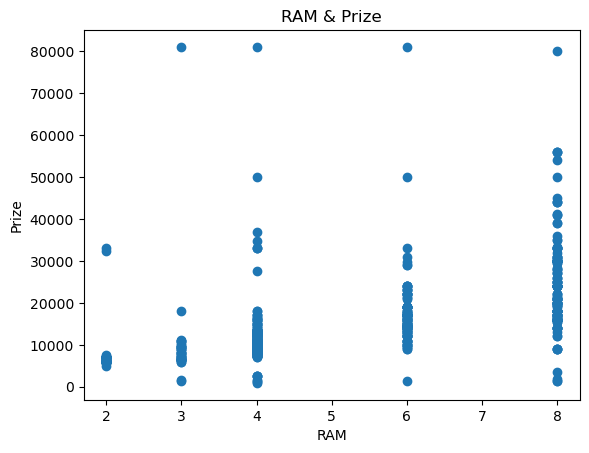

In [32]:
plt.scatter(df['RAM'],df['Prize'])
plt.xlabel('RAM')
plt.ylabel('Prize')
plt.title('RAM & Prize')
plt.show()

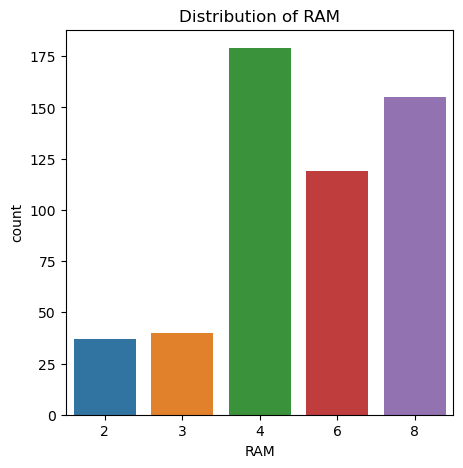

In [33]:
# Count plot RAM
plt.figure(figsize=(5,5))
sns.countplot(x='RAM',data=df)
plt.title('Distribution of RAM')
plt.show()

Text(0.5, 1.0, 'Memory with respect Prize')

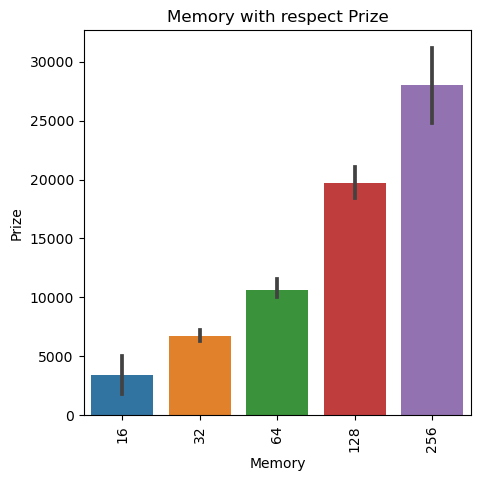

In [34]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
plt.xticks(rotation='vertical')
sns.barplot(data=df,x='Memory',y='Prize',ax=ax)
plt.title('Memory with respect Prize')

Text(0.5, 1.0, 'Rear Camera & Prize')

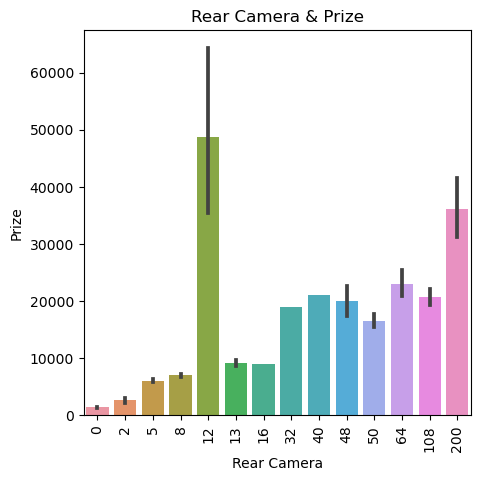

In [35]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
plt.xticks(rotation='vertical')
sns.barplot(data=df,x='Rear Camera',y='Prize',ax=ax)
plt.title('Rear Camera & Prize')

Text(0.5, 1.0, 'Front Camera & Prize')

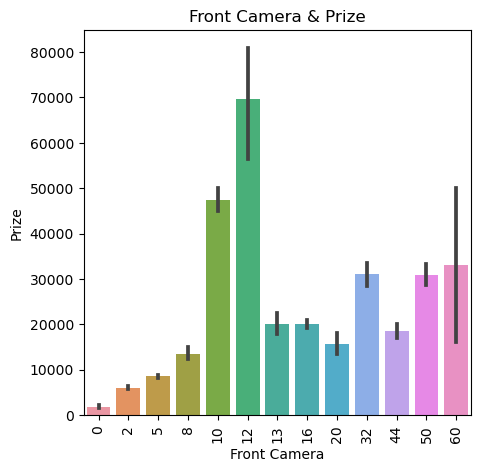

In [36]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
plt.xticks(rotation='vertical')
sns.barplot(data=df,x='Front Camera',y='Prize',ax=ax)
plt.title('Front Camera & Prize')

Text(0.5, 1.0, 'Battery & Prize')

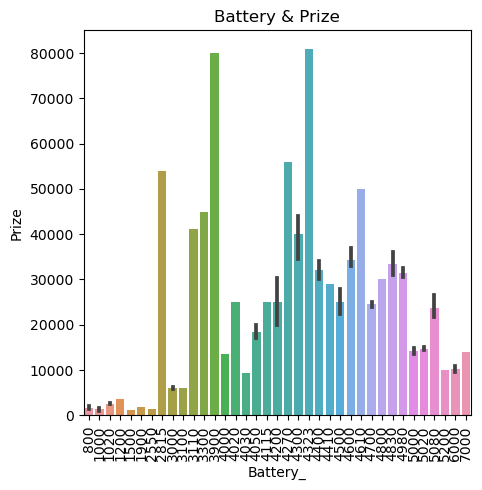

In [37]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
plt.xticks(rotation='vertical')
sns.barplot(data=df,x='Battery_',y='Prize',ax=ax)
plt.title('Battery & Prize')

Text(0.5, 1.0, 'Mobile Height & Prize')

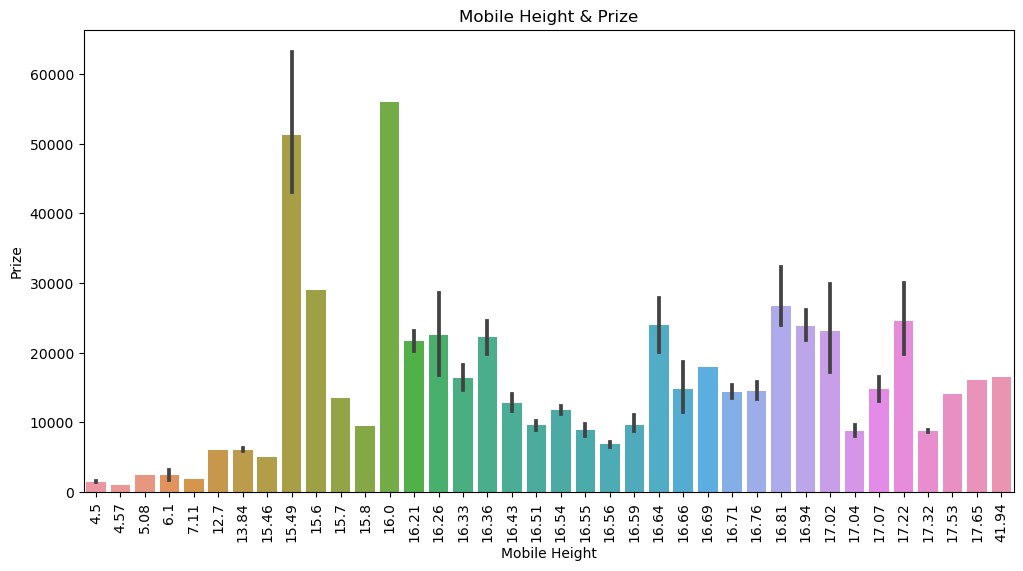

In [38]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=df,x='Mobile Height',y='Prize',ax=ax)
plt.xticks(rotation='vertical')
plt.title('Mobile Height & Prize')

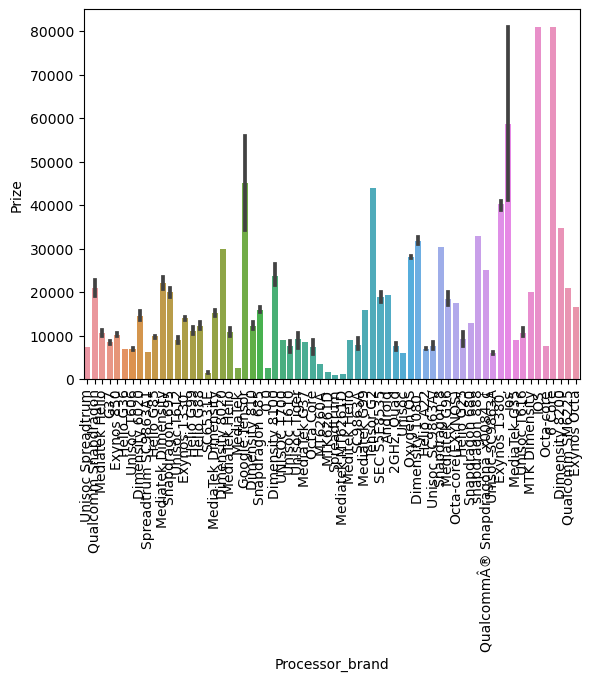

<Figure size 1200x800 with 0 Axes>

In [39]:
sns.barplot(x=df['Processor_brand'],y=df['Prize'])
plt.xticks(rotation='vertical')
plt.figure(figsize=(12,8))
plt.show()

#### Data Preprocessing:

#### Find outliers and remove the outliers useing the quantlie method.

#### Outliers

In [40]:
# To find outlier indexes by quantile method.
q1 = df['Prize'].quantile(.25)
q3 = df['Prize'].quantile(.75)
iqr = q3-q1
min_r = q1-1.5*iqr
max_r = q3+1.5*iqr
outliers = df[(df['Prize']<min_r) | (df['Prize']>max_r)]
outliers

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,Processor_brand
222,SAMSUNG Galaxy S22 Plus 5G,Phantom Black,128,8,4500,50,10,0,16.76,49999,Qualcomm Snapdragon
286,SAMSUNG Galaxy Z Flip3 5G,Phantom Black,128,8,3300,12,10,0,17.02,44999,Qualcomm Snapdragon
305,MOTOROLA Edge 30 Fusion,Cosmic grey,128,8,4400,50,32,0,16.64,34999,Qualcomm Snapdragon
308,Google Pixel 7a,Sea,128,8,4300,64,13,0,15.49,43999,Tensor G2
309,Google Pixel 7a,Charcoal,128,8,4300,64,13,0,15.49,43999,Tensor G2
327,Google Pixel 7a,Snow,128,8,4300,64,13,0,15.49,43999,Tensor G2
396,vivo V27 5G,Magic Blue,256,4,4600,50,50,0,17.22,36999,Mediatek Dimensity
400,MOTOROLA Edge 30 Ultra,Interstellar Black,256,4,4610,200,60,0,16.94,49999,Qualcomm Snapdragon
416,Google Pixel 7,Snow,128,8,4270,50,8,0,16.00,55999,Google Tensor
417,Google Pixel 7,Obsidian,128,8,4270,50,8,0,16.00,55999,Google Tensor


In [41]:
# Remove Outliers
df.drop(outliers.index,inplace=True)

In [42]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,Processor_brand
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,7299,Unisoc Spreadtrum
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,11999,Qualcomm Snapdragon
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,5649,Mediatek Helio
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,8999,G37
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50,5,1,16.76,8999,G37
...,...,...,...,...,...,...,...,...,...,...,...
534,Nokia G11 Plus,Grey,64,4,5000,50,8,0,16.55,9790,Octa Core
535,SAMSUNG Galaxy A04e,Light Blue,64,3,5000,13,5,0,16.51,9999,Mediatek Helio
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,5998,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,9990,MediaTek Helio


In [43]:
df.reset_index(inplace=True)

In [44]:
df.head(3)

,index,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,Processor_brand
0,1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,7299,Unisoc Spreadtrum
1,2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,11999,Qualcomm Snapdragon
2,3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,5649,Mediatek Helio


##### Drop the unnecessary column in dataset index.

In [45]:
df.drop('index',axis=1,inplace=True)

In [46]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,Processor_brand
0,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,7299,Unisoc Spreadtrum
1,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,11999,Qualcomm Snapdragon
2,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,5649,Mediatek Helio
3,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,8999,G37
4,Infinix HOT 30i,Glacier Blue,128,8,5000,50,5,1,16.76,8999,G37
...,...,...,...,...,...,...,...,...,...,...,...
500,Nokia G11 Plus,Grey,64,4,5000,50,8,0,16.55,9790,Octa Core
501,SAMSUNG Galaxy A04e,Light Blue,64,3,5000,13,5,0,16.51,9999,Mediatek Helio
502,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,5998,Octa Core
503,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,9990,MediaTek Helio


In [47]:
#df.to_excel('C:\\Users\\Dell\\Desktop\\Mobile_Price_finel.xlsx')

#### Convert categorical variables using 1 . one-hot encoding.

In [48]:
df1 = pd.get_dummies(df,columns=['Model','Colour','Processor_brand'])
pd.set_option("display.max_columns",None)
df1

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,Model_Google Pixel 6a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Colour_7Â° Purple,Colour_Agate Black,Colour_Alpine White,Colour_Aqua Blue,Colour_Aqua Sky,Colour_Aquamarine Blue,Colour_Arctic Blue,Colour_Arctic White,Colour_Astral Black,Colour_Astral White,Colour_Atlantic Blue,Colour_Atlantic Green,Colour_Atlantis Blue,Colour_Aurora Blue,Colour_Aur

#### Feature Extraction

In [49]:
# Feature Extraction
# let's use a simple correlation analysis for demonstration
correlation_matrix = df.corr()
correlation_matrix

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
Memory,1.000000,0.655719,-0.061591,0.527807,0.458097,-0.085373,0.050313,0.700358
RAM,0.655719,1.000000,-0.080066,0.478326,0.540342,-0.072043,0.100681,0.669818
Battery_,-0.061591,-0.080066,1.000000,0.201982,0.045146,0.139948,0.699229,0.120432
Rear Camera,0.527807,0.478326,0.201982,1.000000,0.470793,-0.036010,0.244998,0.614192
Front Camera,0.458097,0.540342,0.045146,0.470793,1.000000,-0.106774,0.219033,0.673821
AI Lens,-0.085373,-0.072043,0.139948,-0.036010,-0.106774,1.000000,0.050787,-0.172076
Mobile Height,0.050313,0.100681,0.699229,0.244998,0.219033,0.050787,1.000000,0.262771
Prize,0.700358,0.669818,0.120432,0.614192,0.673821,-0.172076,0.262771,1.000000


<Axes: >

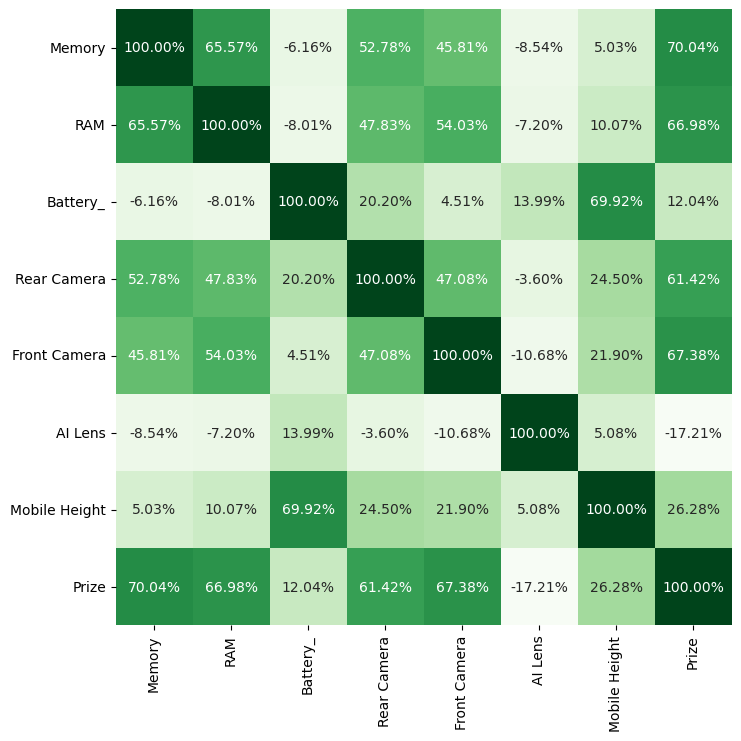

In [50]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

#### Feature Extraction Useing PCA Algorithms and dimensionality reduction

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# x_train = features and y_train = target variable
x = df1.drop('Prize', axis=1)
y = df1['Prize']

In [53]:
# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [54]:
# Standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(df1)

StandardScaler()

In [55]:
standard_scaler_data = standard_scaler.transform(df1)
standard_scaler_data

array([[-0.74738083, -0.67231122,  1.44221049, ..., -0.1       ,
        -0.07730521, -0.04454354],
       [ 0.33021323,  1.35768678,  0.13234799, ..., -0.1       ,
        -0.07730521, -0.04454354],
       [-1.28617786, -1.68731022,  0.13234799, ..., -0.1       ,
        -0.07730521, -0.04454354],
       ...,
       [-1.28617786, -1.68731022, -2.35639076, ..., -0.1       ,
        -0.07730521, -0.04454354],
       [-0.74738083, -0.67231122,  0.13234799, ..., -0.1       ,
        -0.07730521, -0.04454354],
       [ 0.33021323, -0.67231122,  0.13234799, ..., -0.1       ,
        -0.07730521, -0.04454354]])

In [56]:
## Apply PCA Algorithms
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=2)

In [58]:
pca_data = pca.fit_transform(standard_scaler_data)

In [59]:
pca_data

array([[-3.03958957, -4.51794875],
       [ 1.18725247,  0.00714943],
       [-3.29197894, -0.64931924],
       ...,
       [-4.54481101,  3.56223972],
       [-1.47636541, -1.2421762 ],
       [-0.61856442, -0.3731349 ]])

In [60]:
pca.explained_variance_

array([6.04459346, 4.25056575])

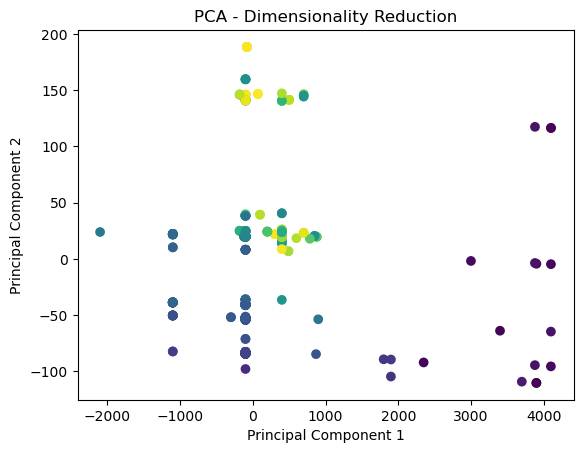

In [61]:
# Apply PCA with 2 components (you can choose the desired number)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Plot the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Dimensionality Reduction')
plt.show()

### Feature selection useing mutual_info_regression

In [62]:
from sklearn.feature_selection import mutual_info_regression
# Detemine the mutual imformetion
mutual_info = mutual_info_regression(x_train,y_train)

In [63]:
mutual_info

array([6.26377425e-01, 7.41716511e-01, 4.42574794e-01, 6.78052976e-01,
       7.18980409e-01, 3.94194180e-02, 5.34734011e-01, 0.00000000e+00,
       4.99307681e-03, 7.83857088e-03, 4.50202873e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.03945544e-02, 1.57553554e-02,
       5.93542317e-02, 1.33006200e-02, 4.44274378e-02, 1.47579036e-02,
       1.76736738e-02, 0.00000000e+00, 0.00000000e+00, 2.86842559e-02,
       2.88201975e-03, 0.00000000e+00, 1.84889533e-02, 3.27013251e-02,
       0.00000000e+00, 0.00000000e+00, 6.56462063e-02, 0.00000000e+00,
       8.05255503e-03, 1.29946687e-02, 3.58285146e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.95522680e-02,
       4.50142558e-03, 0.00000000e+00, 0.00000000e+00, 1.65321314e-02,
       2.35030607e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [64]:
# Convert array to Pandas Series
my_series = pd.Series(mutual_info)

# Display the resulting Series
print(my_series)
my_series.index = x_train.columns

0      0.626377
1      0.741717
2      0.442575
3      0.678053
4      0.718980
         ...   
498    0.000000
499    0.076202
500    0.000000
501    0.010376
502    0.017083
Length: 503, dtype: float64


In [65]:
#pd.set_option("display.max_rows",None)
my_series.sort_values(ascending=False)

RAM                     0.741717
Front Camera            0.718980
Rear Camera             0.678053
Memory                  0.626377
Mobile Height           0.534734
                          ...   
Model_Nokia C01 Plus    0.000000
Colour_Black Engine     0.000000
Colour_Origin Blue      0.000000
Colour_Oxygen Blue      0.000000
Colour_Meteor Grey      0.000000
Length: 503, dtype: float64

<Axes: >

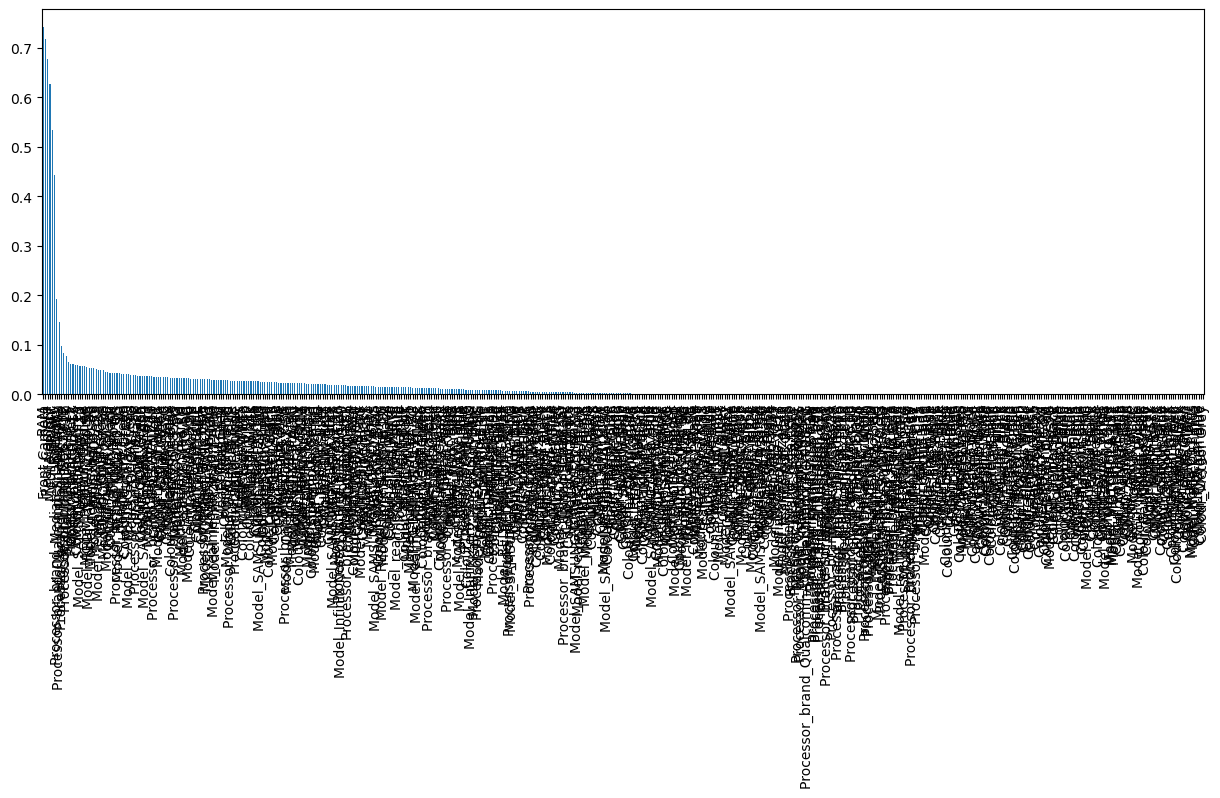

In [66]:
my_series.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [67]:
from sklearn.feature_selection import SelectPercentile

In [68]:
#Selecting the top 5 percentile
selected_top_columns = SelectPercentile(mutual_info_regression,percentile=5)
selected_top_columns.fit(x_train,y_train)
impotent_features = x_train.columns[selected_top_columns.get_support()]

In [69]:
impotent_features

Index(['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'AI Lens',
       'Mobile Height', 'Model_Infinix HOT 30i', 'Model_OnePlus Nord 2T 5G',
       'Model_REDMI A1+', 'Model_REDMI Note 12', 'Model_REDMI Note 12 Pro 5G',
       'Model_SAMSUNG Galaxy A34 5G', 'Model_realme C31', 'Colour_Flash Blue',
       'Colour_M3)', 'Colour_Matte Charcoal', 'Colour_Mithril Grey',
       'Colour_Noble Black', 'Processor_brand_Dimensity 6020',
       'Processor_brand_Exynos 1330,', 'Processor_brand_G37',
       'Processor_brand_Mediatek Dimensity', 'Processor_brand_Mediatek Helio',
       'Processor_brand_Qualcomm Snapdragon', 'Processor_brand_Unisoc T612'],
      dtype='object')

In [70]:
impotent_features.shape

(26,)

In [71]:
X = x[impotent_features]

In [72]:
X

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Model_Infinix HOT 30i,Model_OnePlus Nord 2T 5G,Model_REDMI A1+,Model_REDMI Note 12,Model_REDMI Note 12 Pro 5G,Model_SAMSUNG Galaxy A34 5G,Model_realme C31,Colour_Flash Blue,Colour_M3),Colour_Matte Charcoal,Colour_Mithril Grey,Colour_Noble Black,Processor_brand_Dimensity 6020,"Processor_brand_Exynos 1330,",Processor_brand_G37,Processor_brand_Mediatek Dimensity,Processor_brand_Mediatek Helio,Processor_brand_Qualcomm Snapdragon,Processor_brand_Unisoc T612
0,64,4,6000,13,5,1,16.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,128,8,5000,50,16,0,16.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,32,2,5000,8,5,0,16.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,128,8,5000,50,5,1,16.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,128,8,5000,50,5,1,16.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,64,4,5000,50,8,0,16.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
501,64,3,5000,13,5,0,16.51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
502,32,2,3100,5,2,0,12.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
503,64,4,5000,50,8,0,16.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
y

0       7299
1      11999
2       5649
3       8999
4       8999
       ...  
500     9790
501     9999
502     5998
503     9990
504    15999
Name: Prize, Length: 505, dtype: Int64

#### Model Building:

#### 1 :- Useing the LinearRegression

In [74]:
X.head(3)

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Model_Infinix HOT 30i,Model_OnePlus Nord 2T 5G,Model_REDMI A1+,Model_REDMI Note 12,Model_REDMI Note 12 Pro 5G,Model_SAMSUNG Galaxy A34 5G,Model_realme C31,Colour_Flash Blue,Colour_M3),Colour_Matte Charcoal,Colour_Mithril Grey,Colour_Noble Black,Processor_brand_Dimensity 6020,"Processor_brand_Exynos 1330,",Processor_brand_G37,Processor_brand_Mediatek Dimensity,Processor_brand_Mediatek Helio,Processor_brand_Qualcomm Snapdragon,Processor_brand_Unisoc T612
0,64,4,6000,13,5,1,16.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,128,8,5000,50,16,0,16.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,32,2,5000,8,5,0,16.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [75]:
y.head(3)

0     7299
1    11999
2     5649
Name: Prize, dtype: Int64

In [76]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [77]:
X_train.shape

(404, 26)

In [78]:
y_test.shape

(101,)

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [81]:
lr.score(X_test,y_test)

0.783806752036387

In [82]:
lr.score(X_train,y_train)

0.7754564010384756

In [83]:
lr.coef_

array([ 3.62268437e+01,  5.03144260e+02,  8.33932106e-01,  3.46171604e+01,
        2.46921494e+02, -2.17302093e+03,  1.38998401e+02, -7.75401001e+02,
        7.41307567e+03,  8.90787028e+01,  1.80763720e+03,  4.69290957e+03,
        1.40452329e+04,  7.25956397e+02, -7.27808843e+02,  4.74122886e+02,
       -2.17354929e+03, -1.22921546e+03,  5.20454842e+03,  2.83103509e+02,
       -1.69824173e+03, -7.75401001e+02,  2.56424746e+03, -2.81343883e+02,
        2.50729760e+03, -2.44395565e+02])

#### Predict the model useing LinearRegression

In [84]:
y_predict = lr.predict(X_test)
y_predict

array([30450.43931057, 17000.52296594, 10791.08997376, 11325.76964327,
        8625.01896517, 10694.0559728 , 21712.68923718, 19659.97942342,
       11597.22239921, 16241.74541556, 11949.82548281, 12032.64736544,
        6158.66199114, 32713.19598409, 20706.40071628, 19595.12468344,
       14122.84641146, 14122.84641146,  6587.26322995, 23463.86139358,
       17820.5368792 , 13915.74039595, 11325.76964327, 17190.11079804,
       19668.75435183,  8741.69087713, 16649.57317959, 34976.77699511,
       13355.33743863, 15337.65931328, 15234.83998065, 16363.74240399,
       15357.45388309,  6661.80625159, 17622.53269687, 15623.85549518,
        6437.80715634, 21662.689297  ,  7735.40235622, 15234.83998065,
        9517.2049604 , 15405.28852091, 10798.03989382,  6403.05755604,
       16649.57317959, 20638.33098394, 24758.50044235, 12032.64736544,
       15656.86468182,  7957.20273361,  1682.15260481, 27494.12842802,
        5424.04522605, 13362.28735869, 23380.39511177,  6720.88655627,
      

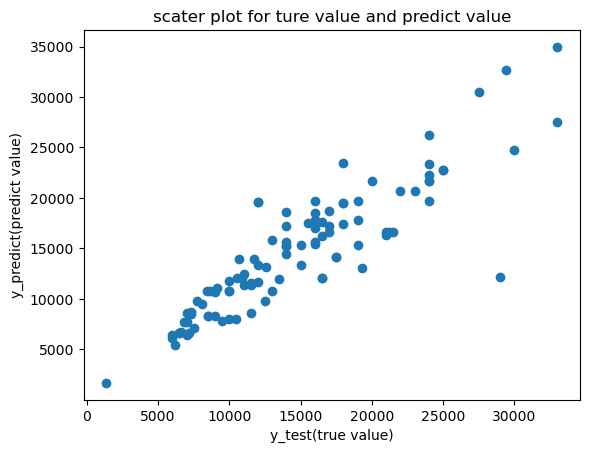

In [85]:
plt.scatter(y_test,y_predict)
plt.xlabel('y_test(true value)')
plt.ylabel('y_predict(predict value)')
plt.title('scater plot for ture value and predict value')
plt.show()

#### LinearRegresion algorithms
* X_train y_train Score = 0.79
* X_test y_test Score = 0.79

#### 2:- useing the AdaBoostRegressor

In [86]:
from sklearn.ensemble import AdaBoostRegressor

In [87]:
abr = AdaBoostRegressor()
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [88]:
abr.score(X_train,y_train)

0.8265825212799803

In [89]:
abr.score(X_test,y_test)

0.7734463738735663

In [90]:
y_predict = abr.predict(X_test)
y_predict

array([25672.84210526, 21748.76811594, 11622.76666667, 11622.76666667,
       11622.76666667, 11622.76666667, 21748.76811594, 25383.65662651,
       11622.76666667, 17746.07563025, 13646.875     , 14860.58928571,
        7823.80952381, 26413.21808511, 19102.30508475, 21748.76811594,
       13646.875     , 13646.875     ,  8591.26436782, 25383.65662651,
       19102.30508475, 12794.04545455, 11622.76666667, 19102.30508475,
       21748.76811594,  8591.26436782, 17746.07563025, 26413.21808511,
       12145.60810811, 14860.58928571, 14860.58928571, 21748.76811594,
       17746.07563025,  7823.80952381, 14462.33333333, 13646.875     ,
        7823.80952381, 21748.76811594,  8591.26436782, 14860.58928571,
       10005.35135135, 12969.94444444, 11622.76666667,  7823.80952381,
       17746.07563025, 19102.30508475, 25383.65662651, 14860.58928571,
       12969.94444444,  8591.26436782,  1863.        , 28199.45098039,
        7823.80952381, 12145.60810811, 19102.30508475,  7823.80952381,
      

In [91]:
abr.feature_importances_

array([2.02785136e-01, 1.21829479e-01, 6.59474585e-02, 4.59643304e-02,
       4.82963486e-01, 0.00000000e+00, 2.62541126e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.87448645e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.11678541e-04, 1.04687996e-02,
       4.83065417e-03, 0.00000000e+00])

In [92]:
X_train.columns

Index(['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'AI Lens',
       'Mobile Height', 'Model_Infinix HOT 30i', 'Model_OnePlus Nord 2T 5G',
       'Model_REDMI A1+', 'Model_REDMI Note 12', 'Model_REDMI Note 12 Pro 5G',
       'Model_SAMSUNG Galaxy A34 5G', 'Model_realme C31', 'Colour_Flash Blue',
       'Colour_M3)', 'Colour_Matte Charcoal', 'Colour_Mithril Grey',
       'Colour_Noble Black', 'Processor_brand_Dimensity 6020',
       'Processor_brand_Exynos 1330,', 'Processor_brand_G37',
       'Processor_brand_Mediatek Dimensity', 'Processor_brand_Mediatek Helio',
       'Processor_brand_Qualcomm Snapdragon', 'Processor_brand_Unisoc T612'],
      dtype='object')

#### Feature importances model useing AdaBoostRegressor

In [93]:
pd.DataFrame(index=X_train.columns,data=abr.feature_importances_,
            columns = ['feature importances']).sort_values('feature importances',ascending=False,)

,feature importances
Front Camera,0.482963
Memory,0.202785
RAM,0.121829
Battery_,0.065947
Rear Camera,0.045964
Model_SAMSUNG Galaxy A34 5G,0.038745
Mobile Height,0.026254
Processor_brand_Mediatek Helio,0.010469
Processor_brand_Qualcomm Snapdragon,0.004831
Processor_brand_Mediatek Dimensity,0.000212


##### There are some important features front camera,Memory,RAM,Battery,Rear camera,Mobile hights

#### AdaBoostRegressor algorithms
* X_train y_train Score = 0.79
* X_test y_test Score = 0.72 

#### 3 :- Model useing the GradientBoostingRegressor

In [94]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [95]:
gbr.score(X_train,y_train)

0.9474548752151617

In [96]:
gbr.score(X_test,y_test)

0.8651069737829893

In [97]:
gbr.feature_importances_

array([1.44067470e-01, 5.28212852e-02, 1.04049767e-01, 6.01714545e-02,
       5.42750899e-01, 1.71690859e-03, 3.74306488e-02, 1.77055519e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.09524080e-02,
       2.34089744e-02, 1.42163844e-06, 7.70716499e-06, 0.00000000e+00,
       0.00000000e+00, 2.13014840e-08, 7.09308099e-05, 1.61084411e-04,
       7.82365233e-04, 1.35750613e-04, 8.13445270e-03, 3.90240795e-03,
       9.02411291e-03, 2.32873300e-04])

In [98]:
y_predict = gbr.predict(X_test)
y_predict

array([27324.87407493, 17389.12477023, 10362.44616282, 11401.89368817,
        9941.80089758,  9203.23446494, 20497.16971391, 23351.65843138,
        8990.89045267, 15118.84861328, 13414.61314149, 13057.75980132,
        6793.97334606, 28474.30608287, 19532.46696014, 19370.05898611,
       14432.01139001, 14432.01139001,  7909.63259755, 23028.79298343,
       17387.40586676, 11128.1622987 , 11401.89368817, 17906.48342974,
       19259.65765748,  8118.3485223 , 18780.61918116, 32444.79988366,
       11776.8501939 , 14898.80317991, 12170.9321453 , 18980.92998925,
       17085.8709923 ,  7000.68084955, 16318.54975739, 15047.81980686,
        6846.25807522, 20416.76507471,  7776.94501821, 12170.9321453 ,
        9793.47141212, 14891.67180285, 10362.44616282,  6799.76917518,
       18780.61918116, 20484.26678817, 26299.07786305, 13057.75980132,
       15443.14859157,  8308.52375739,  2669.70150004, 33467.64102944,
        6733.8948798 , 12356.70528325, 23276.18805258,  7054.82914205,
      

#### Feature importances model useing GradientBoostingRegressor

In [99]:
pd.DataFrame(index=X_train.columns,data=gbr.feature_importances_,
            columns = ['feature importances']).sort_values('feature importances',ascending=False,)

,feature importances
Front Camera,5.427509e-01
Memory,1.440675e-01
Battery_,1.040498e-01
Rear Camera,6.017145e-02
RAM,5.282129e-02
Mobile Height,3.743065e-02
Model_SAMSUNG Galaxy A34 5G,2.340897e-02
Model_REDMI Note 12 Pro 5G,1.095241e-02
Processor_brand_Qualcomm Snapdragon,9.024113e-03
Processor_brand_Mediatek Dimensity,8.134453e-03


##### There are some most importent features ascending top 10 featurers.

#### GradientBoostingRegressor algorithms
* X_train y_train Score = 0.92
* X_test y_test Score = 0.86

#### 4 :- Model useing the DecisionTreeRegressor

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [102]:
dtr.score(X_train,y_train)

0.9943234177524793

In [103]:
dtr.score(X_test,y_test)

0.9022406769707445

In [104]:
dtr.predict(X_test)

array([29790.        , 12499.        ,  9999.        , 10999.        ,
       11499.        ,  9499.        , 18665.66666667, 23999.        ,
        9499.        , 16499.        , 13499.        , 16499.        ,
        6872.        , 29999.        , 22999.        , 16999.        ,
       16999.        , 16999.        ,  6799.        , 17999.        ,
       17999.        , 10499.        , 10999.        , 16999.        ,
       17131.66666667,  7630.        , 17499.        , 32999.        ,
       11999.        , 11499.        , 11614.        , 20999.        ,
       18999.        ,  6872.        , 16499.        , 15999.        ,
        5994.5       , 19999.        ,  6799.        , 11614.        ,
        7993.        , 15999.        ,  9161.33333333,  7211.5       ,
       17499.        , 21999.        , 30999.        , 16499.        ,
       13999.        ,  7299.        ,  1599.        , 32999.        ,
        6199.        , 14999.        , 23999.        ,  6599.        ,
      

#### Feature importances model useing DecisionTreeRegressor

In [105]:
pd.DataFrame(index=X_train.columns,data=dtr.feature_importances_,
            columns = ['feature importances']).sort_values('feature importances',ascending=False,)

,feature importances
Front Camera,0.547030
Battery_,0.120652
Rear Camera,0.085295
Memory,0.082812
Mobile Height,0.054758
RAM,0.044467
Model_SAMSUNG Galaxy A34 5G,0.032444
Model_REDMI Note 12 Pro 5G,0.011886
Processor_brand_Qualcomm Snapdragon,0.009377
Processor_brand_Mediatek Dimensity,0.004812


#### DecisionTreeRegressor algorithms
* X_train y_train Score = 0.99
* X_test y_test Score =0.65

#### 5 :- Model useing the RandomForestRegressor

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [108]:
rfr.score(X_train,y_train)

0.9821754622414874

In [109]:
rfr.score(X_test,y_test)

0.8833998690897147

In [110]:
Y_Predict = rfr.predict(X_test)

In [111]:
Y_Predict

array([24611.22066667, 17347.00833333, 10039.23233333, 11087.17      ,
       11251.02714286,  9371.60833333, 18899.22095238, 23998.81      ,
        9389.20333333, 15803.46      , 14650.21428571, 14633.54      ,
        7094.87702778, 26990.315     , 22669.39      , 17438.11166667,
       16716.04761905, 16716.04761905,  6814.48811905, 19604.        ,
       17821.89285714, 10701.16666667, 11087.17      , 17119.71428571,
       17493.02209524,  7705.68633333, 16995.81      , 29199.        ,
       12229.        , 12759.05      , 11651.617     , 20815.843     ,
       18778.91      ,  6895.11633333, 17436.73809524, 16338.71904762,
        6027.2805    , 19951.19333333,  6823.94666667, 11651.617     ,
        8402.98505952, 15619.        ,  9206.17670238,  7215.34595238,
       16995.81      , 21759.        , 30411.17857143, 14633.54      ,
       14220.66666667,  8552.728     ,  3167.45833333, 32168.25      ,
        6247.        , 14450.9205    , 23743.82      ,  6551.        ,
      

#### Feature importances model useing RandomForestRegressor

In [112]:
pd.DataFrame(index=X_train.columns,data=rfr.feature_importances_,
            columns = ['feature importances']).sort_values('feature importances',ascending=False,)

,feature importances
Front Camera,0.568306
Memory,0.085556
Battery_,0.084749
Rear Camera,0.081809
Mobile Height,0.063535
RAM,0.054615
Model_SAMSUNG Galaxy A34 5G,0.020452
Processor_brand_Qualcomm Snapdragon,0.011114
Model_REDMI Note 12 Pro 5G,0.010806
Processor_brand_Mediatek Dimensity,0.009982


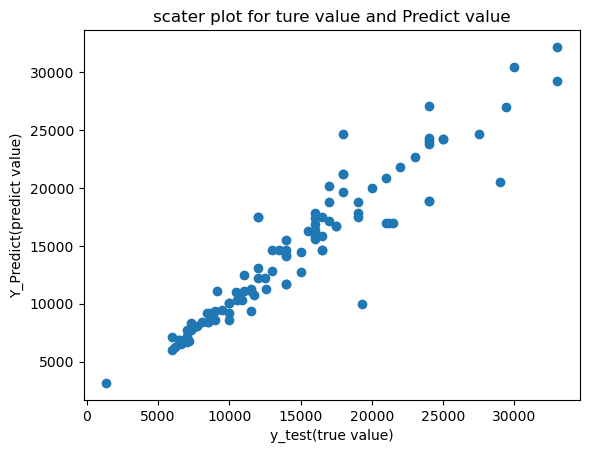

In [113]:
# Visualization 
plt.scatter(y_test,Y_Predict)
plt.xlabel('y_test(true value)')
plt.ylabel('Y_Predict(predict value)')
plt.title('scater plot for ture value and Predict value')
plt.show()

#### RandomForestRegressor is the best algorithms for this data Because
* X_train y_train Score =0.98
* X_test y_test Score = 0.84

#### Model Evaluation:

In [114]:
# Predict on the test set RandomForestRegressor algorithms
y_prict = rfr.predict(X_test)
y_prict

array([24611.22066667, 17347.00833333, 10039.23233333, 11087.17      ,
       11251.02714286,  9371.60833333, 18899.22095238, 23998.81      ,
        9389.20333333, 15803.46      , 14650.21428571, 14633.54      ,
        7094.87702778, 26990.315     , 22669.39      , 17438.11166667,
       16716.04761905, 16716.04761905,  6814.48811905, 19604.        ,
       17821.89285714, 10701.16666667, 11087.17      , 17119.71428571,
       17493.02209524,  7705.68633333, 16995.81      , 29199.        ,
       12229.        , 12759.05      , 11651.617     , 20815.843     ,
       18778.91      ,  6895.11633333, 17436.73809524, 16338.71904762,
        6027.2805    , 19951.19333333,  6823.94666667, 11651.617     ,
        8402.98505952, 15619.        ,  9206.17670238,  7215.34595238,
       16995.81      , 21759.        , 30411.17857143, 14633.54      ,
       14220.66666667,  8552.728     ,  3167.45833333, 32168.25      ,
        6247.        , 14450.9205    , 23743.82      ,  6551.        ,
      

#### Error

In [115]:
Error = y_test-y_prict
Error

350    2928.779333
103   -1348.008333
89      -40.232333
445         402.83
146     247.972857
          ...     
328      -494.2355
12     -160.676667
381   -1966.442238
314   -6626.393333
193       -504.718
Name: Prize, Length: 101, dtype: Float64

####  :- MAE = Mean absolute error
####  :-MSE = Mean Sequared error
####  :-RMSE = Root Mean Squared Error

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [117]:
# Evaluate performance using metrics
mae = mean_absolute_error(y_test,y_prict )
mse = mean_squared_error(y_test, y_prict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 1392.0122558148673
Mean Squared Error: 5089442.148398178


#### RMSE = Root Mean Squared Error

In [118]:
def rmse(predictions, targets):
    return np.sqrt((( y_prict-y_test ) ** 2).mean())

In [119]:
rmse(y_prict,y_test)

2255.979199460442